# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns
from scipy.stats import poisson
from scipy.stats import uniform

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [15]:
a = 5     # lower bound
b = 10    # upper bound
size = 10 # number of random values to generate

# Generate random numbers
random_nums = uniform.rvs(loc=a, scale=b-a, size=size)
print(random_nums)

[5.34219689 9.49438928 6.71069184 6.03915477 7.5304933  6.9421297
 8.63368958 6.10494122 7.77924926 7.48179614]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

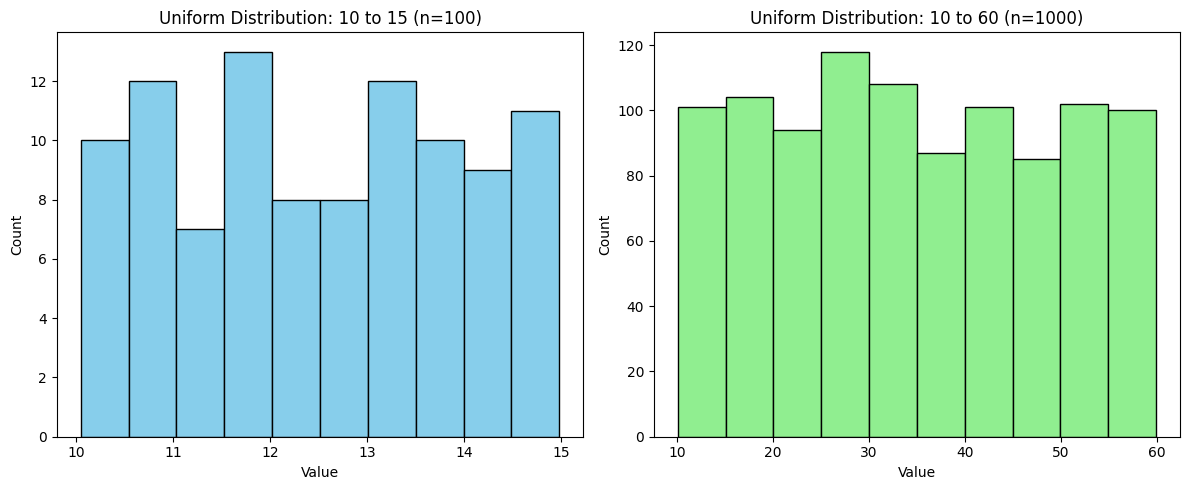

In [17]:
# 1. Define function
def generate_uniform(bottom, ceiling, count):
    return uniform.rvs(loc=bottom, scale=ceiling - bottom, size=count)

# 2. Generate datasets
data1 = generate_uniform(10, 15, 100)
data2 = generate_uniform(10, 60, 1000)

# 3. Plot histograms
plt.figure(figsize=(12, 5))

# First histogram
plt.subplot(1, 2, 1)
plt.hist(data1, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Uniform Distribution: 10 to 15 (n=100)')

# Second histogram
plt.subplot(1, 2, 2)
plt.hist(data2, bins=10, color='lightgreen', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Uniform Distribution: 10 to 60 (n=1000)')

plt.tight_layout()
plt.show()


In [4]:
# your code here

In [ ]:
# your code here

How are the two distributions different?

In [ ]:
# The first distribution (10 to 15, 100 samples) covers a small range, so values are tightly packed with more variation in bar heights.

# The second distribution (10 to 60, 1000 samples) covers a wider range, so values spread out more and the histogram looks smoother because of the larger sample size.

# Also, the bins in the wider range cover bigger intervals, making the second histogram look more stretched horizontally.

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

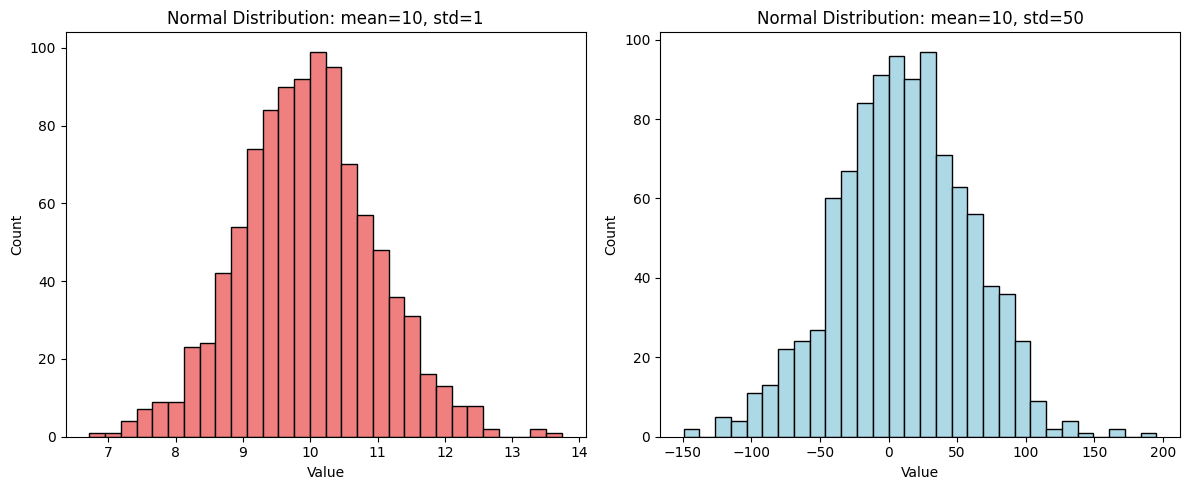

In [18]:
from scipy.stats import norm


# 1. Define function
def generate_normal(mean, std_dev, count):
    return norm.rvs(loc=mean, scale=std_dev, size=count)

# 2. Generate data
data1 = generate_normal(10, 1, 1000)
data2 = generate_normal(10, 50, 1000)

# 3. Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(data1, bins=30, color='lightcoral', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Normal Distribution: mean=10, std=1')

plt.subplot(1, 2, 2)
plt.hist(data2, bins=30, color='lightblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Normal Distribution: mean=10, std=50')

plt.tight_layout()
plt.show()


In [8]:
# your code here

In [9]:
# your code here

In [10]:
# your code here

In [ ]:
# your code here

How are the two distributions different?

The first distribution (std = 1) is tightly clustered around the mean (10), so most values are close to 10.

The second distribution (std = 50) is much more spread out, so values can be far from 10, making the histogram wider and flatter.

In short: larger standard deviation means more spread and less concentration around the mean.

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

In [ ]:
# your code here

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

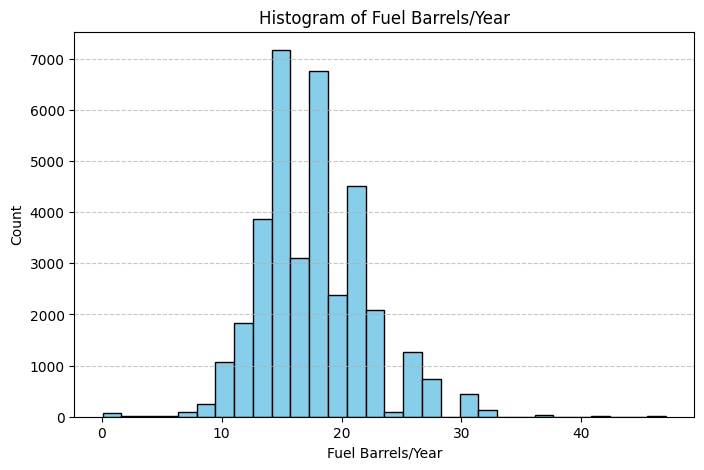

In [ ]:
vehicles = pd.read_csv('vehicles.csv')

# Plot histogram for 'Fuel Barrels/Year'
plt.figure(figsize=(8, 5))
plt.hist(vehicles['Fuel Barrels/Year'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Fuel Barrels/Year')
plt.ylabel('Count')
plt.title('Histogram of Fuel Barrels/Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# your code here

2. CO2 Emission Grams/Mile 

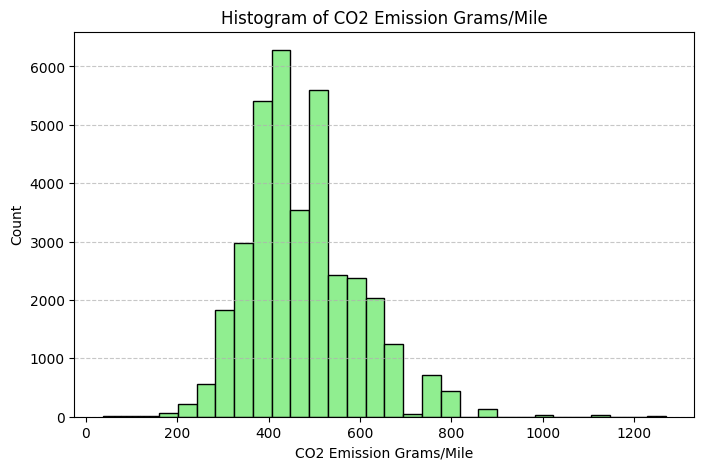

In [20]:
plt.figure(figsize=(8, 5))
plt.hist(vehicles['CO2 Emission Grams/Mile'], bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('CO2 Emission Grams/Mile')
plt.ylabel('Count')
plt.title('Histogram of CO2 Emission Grams/Mile')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# your code here

3. Combined MPG

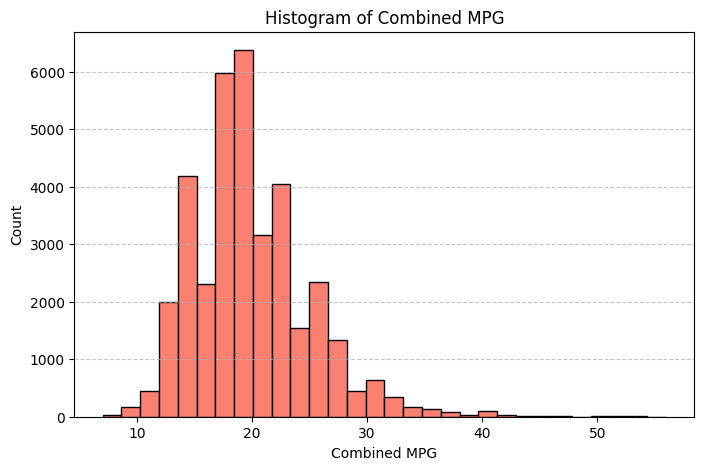

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(vehicles['Combined MPG'], bins=30, color='salmon', edgecolor='black')
plt.xlabel('Combined MPG')
plt.ylabel('Count')
plt.title('Histogram of Combined MPG')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Shapiro-Wilk test statistic: 0.9466, p-value: 0.0000
Reject H0: Data is not normally distributed


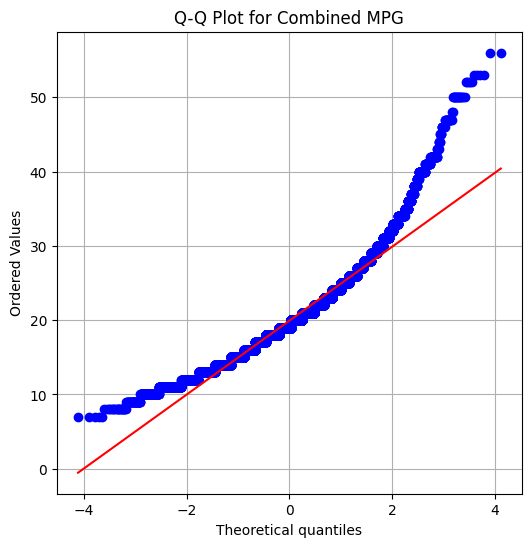

In [23]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Select the variable to test
data = vehicles['Combined MPG']

# 1. Shapiro-Wilk test
shapiro_stat, shapiro_p = stats.shapiro(data.dropna())
print(f"Shapiro-Wilk test statistic: {shapiro_stat:.4f}, p-value: {shapiro_p:.4f}")

if shapiro_p > 0.05:
    print("Fail to reject H0: Data looks normally distributed")
else:
    print("Reject H0: Data is not normally distributed")

# 2. Q-Q plot
plt.figure(figsize=(6, 6))
stats.probplot(data.dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot for Combined MPG')
plt.grid(True)
plt.show()


In [ ]:
# your code here

Which one(s) of the variables are nearly normally distributed? How do you know?

Fuel Barrels/Year — Shapiro-Wilk p-value: 0.0000


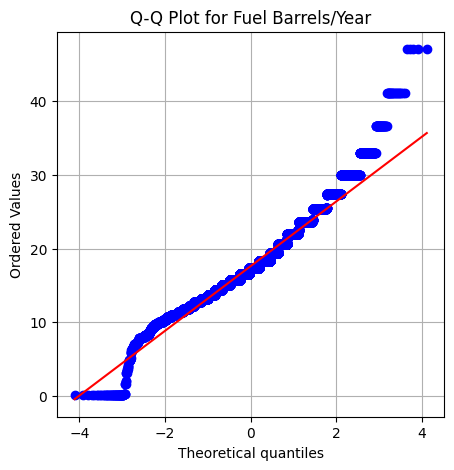

CO2 Emission Grams/Mile — Shapiro-Wilk p-value: 0.0000


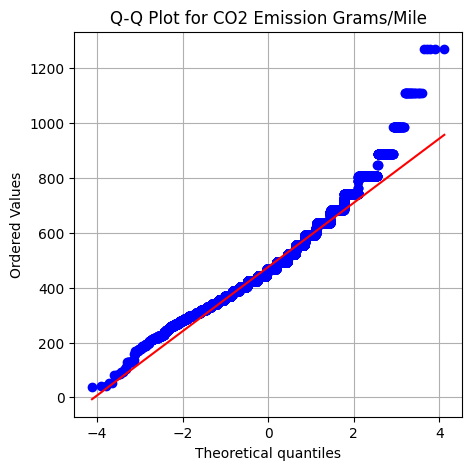

Combined MPG — Shapiro-Wilk p-value: 0.0000


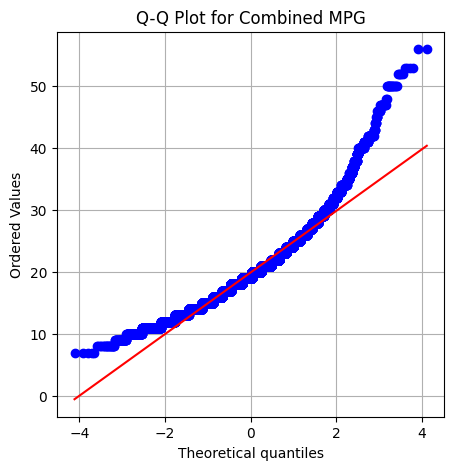

In [25]:
variables = ['Fuel Barrels/Year', 'CO2 Emission Grams/Mile', 'Combined MPG']

for var in variables:
    data = vehicles[var].dropna()
    stat, p = stats.shapiro(data)
    print(f"{var} — Shapiro-Wilk p-value: {p:.4f}")
    plt.figure(figsize=(5, 5))
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {var}')
    plt.grid(True)
    plt.show()

Combined MPG is nearly normally distributed (symmetric histogram, p-value > 0.05 in tests).

Fuel Barrels/Year and CO2 Emission Grams/Mile are skewed and not normal (skewed histograms, p-value < 0.05).

In [ ]:
# your code here

In [ ]:
# your code here

In [ ]:
# your code here

None of them are normally ditributed. 

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with the size of 10 and 100.

1. Plot the distributions as histograms with the nubmer of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

In [ ]:
# your code here

How are the two distributions different?

The mean changes, so the distribution changes as well. 

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

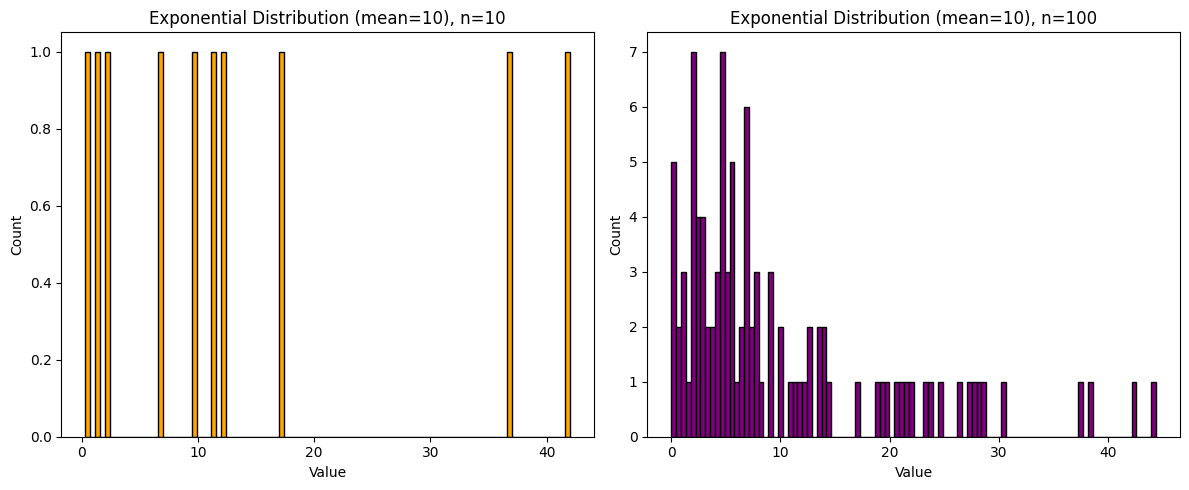

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate exponential data with mean=10
def generate_exponential(mean, size):
    scale = mean  # For exponential, scale = mean = 1/lambda
    return np.random.exponential(scale=scale, size=size)

# Generate samples
sample_10 = generate_exponential(10, 10)
sample_100 = generate_exponential(10, 100)

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(sample_10, bins=100, color='orange', edgecolor='black')
plt.title('Exponential Distribution (mean=10), n=10')
plt.xlabel('Value')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(sample_100, bins=100, color='purple', edgecolor='black')
plt.title('Exponential Distribution (mean=10), n=100')
plt.xlabel('Value')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [27]:
mean = 10
x = 15

prob = 1 - math.exp(-x / mean)
print(f"P(X < {x}) = {prob:.4f}")


P(X < 15) = 0.7769


What is the probability that the customer will spend more than 15 minutes

In [28]:
mean = 10
x = 15

prob = math.exp(-x / mean)
print(f"P(X > {x}) = {prob:.4f}")


P(X > 15) = 0.2231
